<a href="https://colab.research.google.com/github/VasylDvorakDS/Items-_pictures_prediction_with_CNN/blob/master/Items__pictures_prediction_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:


# Install TensorFlow


try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)



Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.15.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model

In [4]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape", y_train.shape)

170498071/170498071 [==============================] - 2s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape (50000,)


In [5]:


# number of classes
K = len(set(y_train))
print("number of classes:", K)



number of classes: 10


In [6]:


# Build the model using the functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)



In [7]:
# Compile and fit
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1563/1563 [==============================] - 53s 33ms/step - loss: 1.5805 - accuracy: 0.4236 - val_loss: 1.3220 - val_accuracy: 0.5244
Epoch 2/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.2798 - accuracy: 0.5390 - val_loss: 1.1343 - val_accuracy: 0.5881
Epoch 3/15
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1524 - accuracy: 0.5872 - val_loss: 1.0426 - val_accuracy: 0.6379
Epoch 4/15
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0679 - accuracy: 0.6199 - val_loss: 0.9994 - val_accuracy: 0.6500
Epoch 5/15
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9906 - accuracy: 0.6457 - val_loss: 0.9438 - val_accuracy: 0.6676
Epoch 6/15
1563/1563 [==============================] - 51s 33ms/step - loss: 0.9307 - accuracy: 0.6702 - val_loss: 0.9001 - val_accuracy: 0.6899
Epoch 7/15
1563/1563 [==============================] - 50s 32ms/step - loss: 0.8822 - accuracy: 0.6853 - val_loss: 0.8927 -

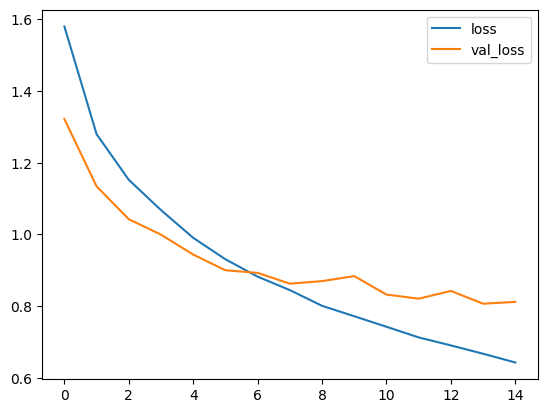

In [8]:


# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()



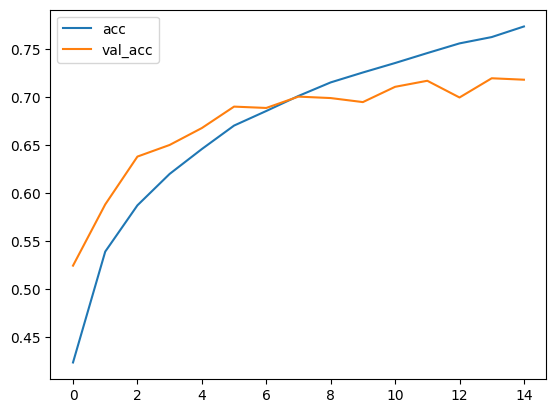

In [9]:


# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()



313/313 [==============================] - 3s 10ms/step
Confusion matrix, without normalization
[[771  25  29  18   9   3   9  10  80  46]
 [ 12 837   5   5   1   2   7   3  24 104]
 [ 75   6 551  74 121  65  48  30  21   9]
 [ 29   8  49 530  77 159  68  39  19  22]
 [ 27   0  47  53 732  21  47  51  12  10]
 [ 12   8  41 201  73 568  23  53  14   7]
 [ 11   6  30  53  56  29 791  10  10   4]
 [ 12   3  27  35  71  59  10 752   7  24]
 [ 43  36  10  12   9   5   4   3 850  28]
 [ 29 103   6  21   1   3   5  13  22 797]]


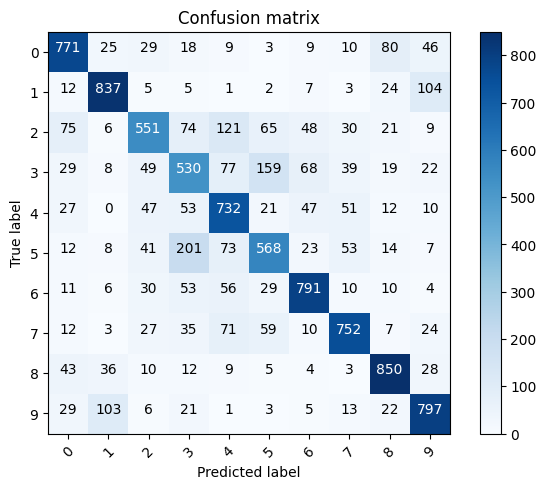

In [10]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

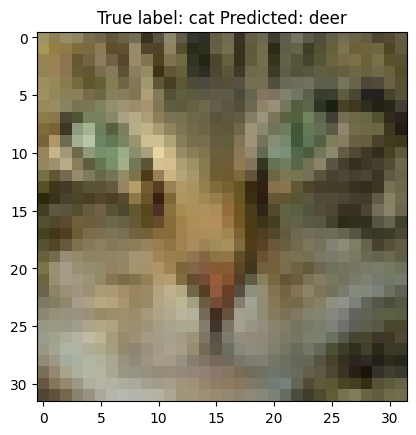

In [12]:


# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

